# Convert photo to cartoon ONNX Model to OpenVINO™ IR

The aim of portrait cartoon stylization is to transform real photos into cartoon images with portrait's ID information and texture details. We use Generative Adversarial Network method to realize the mapping of picture to cartoon. Considering the difficulty in obtaining paired data and the non-corresponding shape of input and output, we adopt unpaired image translation fashion.

The results of CycleGAN, a classic unpaired image translation method, often have obvious artifacts and are unstable. Recently, Kim et al. propose a novel normalization function (AdaLIN) and an attention module in paper "U-GAT-IT" and achieve exquisite selfie2anime results.

Different from the exaggerated anime style, our cartoon style is more realistic and contains unequivocal ID information. To this end, we add a Face ID Loss (cosine distance of ID features between input image and cartoon image) to reach identity invariance.

We propose a Soft Adaptive Layer-Instance Normalization (Soft-AdaLIN) method which fuses the statistics of encoding features and decoding features in de-standardization.

Based on U-GAT-IT, two hourglass modules are introduced before encoder and after decoder to improve the performance in a progressively way.

We also pre-process the data to a fixed pattern to help reduce the difficulty of optimization. For details, see below.

This tutorial demonstrates the running results of photo2cartoon and converts it from ONNX model to the IR model used by OpenVION.

Requirements

    ·python 3.6
    ·pytorch 1.4
    ·tensorflow-gpu 1.14
    ·face-alignment
    ·dlib
    ·onnxruntime


## Imports

In [12]:

import sys
import os
from pathlib import Path
sys.path.append("../utils")
from notebook_utils import download_file

import numpy as np
import onnxruntime
import argparse
import cv2


## Prerequisittes

This Model is not in Gihub, so you should pre-dowload it in: [Google Drive](https://drive.google.com/file/d/1PhwKDUhiq8p-UqrfHCqj257QnqBWD523/view?usp=sharing) or [Baidu Cloud](https://pan.baidu.com/share/init?surl=MsT3-He3UGipKhUi4OcCJw) acess code: y2ch. And place the downloaded model in the models folder, place seg_model_384.pb to utils file folder.

In [2]:
# Clone photo2cartoon project

if not Path('photo2cartoon').exists():
    !git clone https://github.com/minivision-ai/photo2cartoon.git
        
%cd photo2cartoon


## Check model inference

`test_onnx.py` script run ONNXmodel to test photo to cartoon.

Please use a young Asian woman photo.

In [5]:
!python test_onnx.py --photo_path ./images/photo_test.jpg --save_path ./images/cartoon_result.png

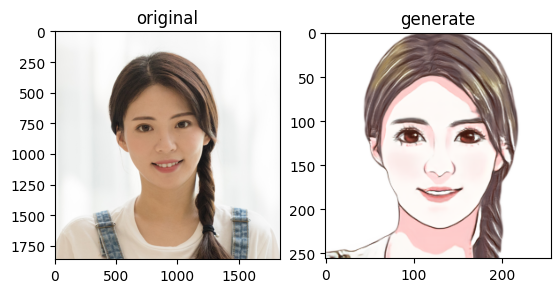

In [7]:

from PIL import Image
import matplotlib.pyplot as plt

original_img = Image.open('./images/photo_test.jpg')
generate_img = Image.open('./images/cartoon_result.png')
fig, ax =plt.subplots(1,2)
ax[0].imshow(original_img)
ax[0].set_title('original')

ax[1].imshow(generate_img)
ax[1].set_title('generate')
plt.show()


This part show how to use the ONNX Model to generate cartoon image.

This open source model is based on the trainning of yong women in Asia.For other groups with insufficient coverage, you can collect the data of corresponding groups according to the use scenario for training.

## Conver ONNX Model to OpenVINO Intermediate Representation (IR)

In [8]:
from openvino.tools import mo
from openvino.runtime import serialize


model = mo.convert_model('./models/photo2cartoon_weights.onnx')

serialize(model, './models/photo2cartoon.xml')


## Verify model inference

At present,i have only completed the transformation of the model.This part will be updated next time.